### Getting Started
Importing modules and downloading files

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
pd.set_option('display.max_colwidth', None)


In [3]:
pulled = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_predictions.txt', 'w') as f:
    f.write( pulled.text )


In [4]:
tweets = pd.read_json('tweet-json copy', lines=True)
main = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
predictions = pd.read_csv('image_predictions.txt', sep='\t')
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1531,789599242079838210,https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg,2,Chesapeake_Bay_retriever,0.878822,True,beagle,0.018570,True,Labrador_retriever,0.017499,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False
1922,856543823941562368,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,1,Boston_bull,0.306910,True,Siamese_cat,0.191218,False,Chihuahua,0.189288,True
218,670073503555706880,https://pbs.twimg.com/media/CUyUSuWXIAAZKYF.jpg,1,malamute,0.601886,True,Siberian_husky,0.340106,True,Eskimo_dog,0.050041,True


In [6]:
main.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1658,683111407806746624,NaN,NaN,2016-01-02 02:23:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Larry. He thought the New Year's parties were tonight. 10/10 poor pupper. Maybe next year https://t.co/h3X0jK8MVM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683111407806746624/photo/1,10,10,Larry,None,None,pupper,None
1225,714141408463036416,NaN,NaN,2016-03-27 17:25:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I know we only rate dogs, but since it's Easter I guess we could rate a bunny for a change. 10/10 petable as hell https://t.co/O2RlKXigHu",NaN,NaN,NaN,https://twitter.com/dog_rates/status/714141408463036416/photo/1,10,10,None,None,None,None,None
1979,672980819271634944,NaN,NaN,2015-12-05 03:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extraordinary dog here. Looks large. Just a head. No body. Rather intrusive. 5/10 would still pet https://t.co/ufHWUFA9Pu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672980819271634944/photo/1,5,10,None,None,None,None,None
2230,668237644992782336,NaN,NaN,2015-11-22 01:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Torque. He served his nickel. Better not owe Torque money. Torque will find u. 10/10 cause I'm scared of him https://t.co/TnSRDqYO5i,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668237644992782336/photo/1,10,10,Torque,None,None,None,None
2089,670789397210615808,NaN,NaN,2015-11-29 02:20:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Two obedient dogs here. Left one has extra leg sticking out of its back. They each get 9/10. Would pet both at once https://t.co/RGcNPsmAfY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670789397210615808/photo/1,9,10,None,None,None,None,None


In [7]:
tweets.sample(5)

created_at                  id              id_str  \
1824 2015-12-14 16:34:00+00:00  676440007570247681  676440007570247680   
1562 2016-01-15 21:52:49+00:00  688116655151435777  688116655151435776   
610  2016-11-11 19:55:50+00:00  797165961484890113  797165961484890112   
2196 2015-11-23 15:35:39+00:00  668815180734689280  668815180734689280   
619  2016-11-08 23:01:49+00:00  796125600683540480  796125600683540480   

                                                                                                                                        full_text  \
1824                                        Hope your Monday isn't too awful. Here's two baseball puppers. 11/10 for each https://t.co/dB0H9hdZai   
1562  Please send dogs. I'm tired of seeing other stuff like this dangerous pirate. We only rate dogs. Thank you... 10/10 https://t.co/YdLytdZOqv   
610                                                                                       @JODYHiGHROLLER it may be an 11/10 but what do I know 😉   
2196    This is a wild Toblerone from Papua New Guinea. Mouth always open. Addicted to hay. Acts blind. 7/10 handsome dog https://t.co/IGmVbz07tZ   
619                                                                                                    #ImWithThor 13/10\nhttps://t.co/a18mzkhTf6   

      truncated display_text_range  \
1824      False           [0, 101]   
1562      False           [0, 139]   
610       False           [16, 55]   
2196      False           [0, 137]   
619       False            [0, 41]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   entities  \
1824   {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 676439996623097856, 'id_str': '676439996623097856', 'indices': [78, 101], 'media_url': 'http://pbs.twimg.com/media/CWMyl86WEAAL1PW.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CWMyl86WEAAL1PW.jpg', 'url': 'https://t.co/dB0H9hdZai', 'display_url': 'pic.twitter.com/dB0H9hdZai', 'expanded_url': 'https://twitter.com/dog_rates/status/676440007570247681/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 576, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 340, 'h': 604, 'resize': 'fit'}, 'medium': {'w': 576, 'h': 1024, 'resize': 'fit'}}}]}   
1562  {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 688116647345848321, 'id_str': '688116647345848321', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CYyucekVAAESj8K.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CYyucekVAAESj8K.jpg', 'url': 'https://t.co/YdLytdZOqv', 'display_url': 'pic.twitter.com/YdLytdZOqv', 'expanded_url': 'https://twitter.com/dog_rates/status/688116655151435777/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 576, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 340, 'h': 604, 'resize': 'fit'}, 'medium': {'w': 576, 'h': 1024, 'resize': 'fit'}}}]}   
610                                                                                                                                                                                                                                                                                                                                                                                                   

Creating a function to drop columns with less than 2 values

In [8]:
def drop_useless(dataframe):
    useless = []
    for i in dataframe.columns:
        try:
            if(dataframe[i].nunique()<2):
                useless.append(i)
        except TypeError:
            pass
    print('\nremoved columns: {}\n\n'.format(useless))
    return dataframe.drop(useless, axis=1)

In [9]:
df = drop_useless(tweets)
df.head()


removed columns: ['truncated', 'geo', 'coordinates', 'contributors', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable']




,created_at,id,id_str,full_text,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,place,is_quote_status,retweet_count,favorite_count,favorited,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,...,None,False,8853,39467,False,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV","[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,...,None,False,6514,33819,False,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.co

In [10]:
archive = drop_useless(main)
archive.sample(5)


removed columns: []




,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1830,676219687039057920,NaN,NaN,2015-12-14 01:58:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth https://t.co/uQt37xlYMJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676219687039057920/photo/1,10,10,Kenneth,None,None,None,None
82,876838120628539392,NaN,NaN,2017-06-19 16:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/876838120628539392/photo/1,https://twitter.com/dog_rates/status/876838120628539392/photo/1",12,10,Ginger,None,None,pupper,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1",12,10,Doc,None,floofer,None,None
754,778764940568104960,NaN,NaN,2016-09-22 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god it's Narcos but Barkos. 13/10 someone please make this happen\nhttps://t.co/tird9cIlzB,NaN,NaN,NaN,https://m.youtube.com/watch?v=idKxCMsS3FQ&feature=youtu.be,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo


In [11]:
predict = drop_useless(predictions)
predict.query('p1_dog == False')


removed columns: []




,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [12]:
print(predict.dtypes, archive.dtypes, df.dtypes, sep='\n\n=========\n\n')

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object


tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


created_at                   datetime64[ns, UTC]
id                               

converting dates to appropiate format

In [13]:
archive['timestamp'] = pd.to_datetime(archive['timestamp'])
archive['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

extracting source name and url.

In [14]:
source_url = archive['source'].apply(lambda x:x.split('"')[1])
archive['source'] = archive['source'].apply(lambda x:x.split('"')[-1][1:-4])
archive['source_url'] = source_url

In [15]:
col = list(archive.columns)
col.insert(5, col.pop(-1))
archive = archive[col]

Converting 'None' strings to Null Values

In [16]:
#convert 'None' Strings to Null values
archive.replace('None', np.nan, inplace=True) 

In [17]:
archive.shape

(2356, 18)

In [18]:
predict.shape

(2075, 12)

In [19]:
type(archive['name'].value_counts().index)

pandas.core.indexes.base.Index

Excluding names that are lower case, which all happen to be like:
(a, an, this, the, etc...)

In [20]:
#set wrong names to nan
wrong_names = list(archive['name'].astype(str).str.islower())
archive.loc[wrong_names, 'name'] = np.nan

Removing data about retweets from other users, as only original tweets data was requested.

In [21]:
#remove retweets
archive.drop(archive[~archive.retweeted_status_id.isna()].index, inplace=True) 
archive.drop(archive[~archive.in_reply_to_user_id.isna()].index, inplace=True) 

Combining dog types into 1 column, some rows contain more than one type, the former is used.

In [22]:
dog_types = archive[['doggo','floofer', 'puppo', 'pupper']]
dog_types.count().sum()

347

In [23]:
dada = dog_types['doggo'].combine(dog_types['floofer'], lambda x,y: y if pd.isna(x) else x )
dada = dada.combine(dog_types['pupper'], lambda x,y: y if pd.isna(x) else x )
dada = dada.combine(dog_types['puppo'], lambda x,y: y if pd.isna(x) else x )

In [24]:
dada.value_counts().sum()

336

Dropping unuseful data.

In [25]:
archive['type'] = dada
archive.drop(['doggo', 'floofer', 'pupper', 'puppo', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_user_id', 'in_reply_to_status_id'], axis=1, inplace=True)

In [26]:
archive.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
source_url                         object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
type                               object
dtype: object

In [27]:
archive['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

Combining the predictions dataset with the tweets data.

In [28]:
combined = archive.merge(predict, on='tweet_id', how ='inner')
combined.shape

(1971, 21)

In [29]:
predict.shape

(2075, 12)

In [30]:
archive.shape

(2097, 10)

In [31]:
combined.head()

,tweet_id,timestamp,source,source_url,text,expanded_urls,rating_numerator,rating_denominator,name,type,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


Dropping data rows, in which the first prediction was not a dog.
keeping in mind that *p1_conf > p2_conf > p3_conf* so even if there are other predictions that say it is a dog, the certainty of such prediction would be less that the certainty of the first prediction which says it is not a dog

In [32]:
combined.drop(combined[~combined['p1_dog']].index, inplace=True)

In [33]:
combined.shape

(1463, 21)

Merging the retweet and favorite counts from the twitter api based on the time of the tweets. because i was uncertain which column related to the tweet id, whether 'id' or id_str'

In [34]:
semi_final = combined.merge(df[['created_at', 'retweet_count', 'favorite_count']], left_on='timestamp', right_on='created_at', how='left')

In [35]:
semi_final.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
source_url                         object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
type                               object
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
created_at            datetime64[ns, UTC]
retweet_count                       int64
favorite_count                    

Dropping more columns which would not be useful in the analysis process.

In [36]:
final = semi_final.drop(['source_url', 'text', 'expanded_urls', 'created_at', 'jpg_url'], axis=1)

In [37]:
final.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,type,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,NaN,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,NaN,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,NaN,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,13,10,NaN,NaN,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,13,10,Jax,NaN,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041


Combining the ratings of the dogs into 1 column

In [38]:
rating = final['rating_numerator'] / final['rating_denominator']
rating.value_counts()

1.200000    380
1.000000    320
1.100000    310
1.300000    208
0.900000    107
0.800000     58
0.700000     24
1.400000     19
0.600000     12
0.500000     11
0.400000      4
0.300000      3
0.200000      2
2.600000      1
2.700000      1
3.428571      1
0.818182      1
7.500000      1
dtype: int64

In [39]:
final.drop(['rating_denominator'], axis = 1, inplace=True)
final.loc[:,'rating_numerator'] = rating
final.rename(columns={'rating_numerator': 'rating'}, inplace=True)
final.head()

,tweet_id,timestamp,source,rating,name,type,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,1.3,Tilly,NaN,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,1.2,Archie,NaN,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,1.2,Franklin,NaN,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,1.3,NaN,NaN,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,1.3,Jax,NaN,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041


Saving the data to A CSV file as requested.

In [40]:
final.to_csv('twitter_archive_master.csv', index=False)

In [41]:
df = pd.read_csv('twitter_archive_master.csv')

Reconverting the timestamp data into appropiate format as it was saved as a string

In [42]:
df.loc[:,'timestamp'] = pd.to_datetime(df['timestamp'])

In [43]:
df.dtypes

tweet_id                        int64
timestamp         datetime64[ns, UTC]
source                         object
rating                        float64
name                           object
type                           object
img_num                         int64
p1                             object
p1_conf                       float64
p1_dog                           bool
p2                             object
p2_conf                       float64
p2_dog                           bool
p3                             object
p3_conf                       float64
p3_dog                           bool
retweet_count                   int64
favorite_count                  int64
dtype: object

Studying the reaction with the tweets over time`

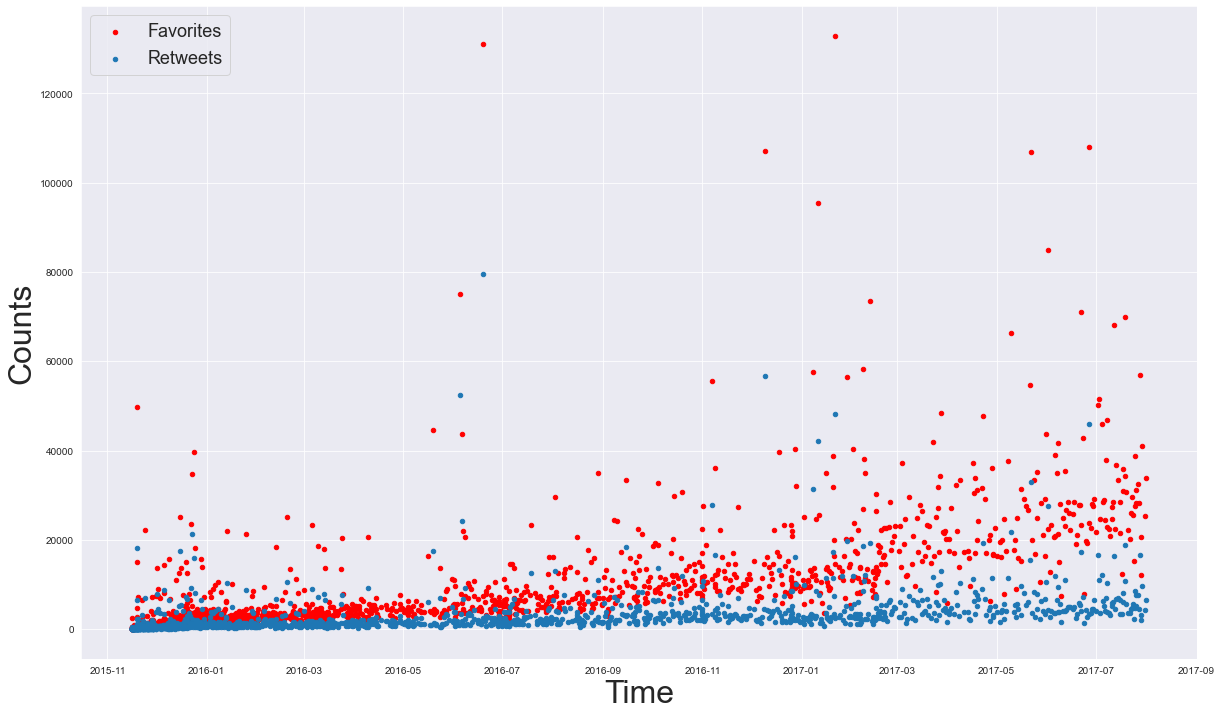

In [44]:
ax = df.plot(x='timestamp', y='favorite_count', kind='scatter', figsize=(20,12), color='r');
df.plot(x='timestamp', y='retweet_count', kind='scatter', ax=ax);
ax.set_xlabel('Time', fontsize=32)
ax.set_ylabel('Counts', fontsize=32)
ax.legend(['Favorites', 'Retweets'], fontsize=18, loc=2);

## Results
Apparantly the favorite count almost doubled over the span of two years, in a sort of squared correlation. yet the retweet count is fairly the same, which tells us that the tweets need to be more engaging with the users.

Studying the correlation between dog type and interactions.

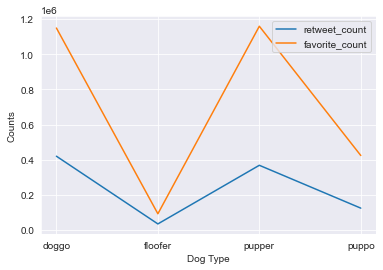

In [45]:
types = df.groupby('type')[['retweet_count', 'favorite_count']].sum().reset_index()
ax = types.plot()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(types['type'])
ax.set_xlabel('Dog Type')
ax.set_ylabel('Counts');

## Results

It looks like the users are much more likely to interact with 'doggo' or 'pupper' dogs than the others.

Studying dog breeds and how it affects the user interactions.

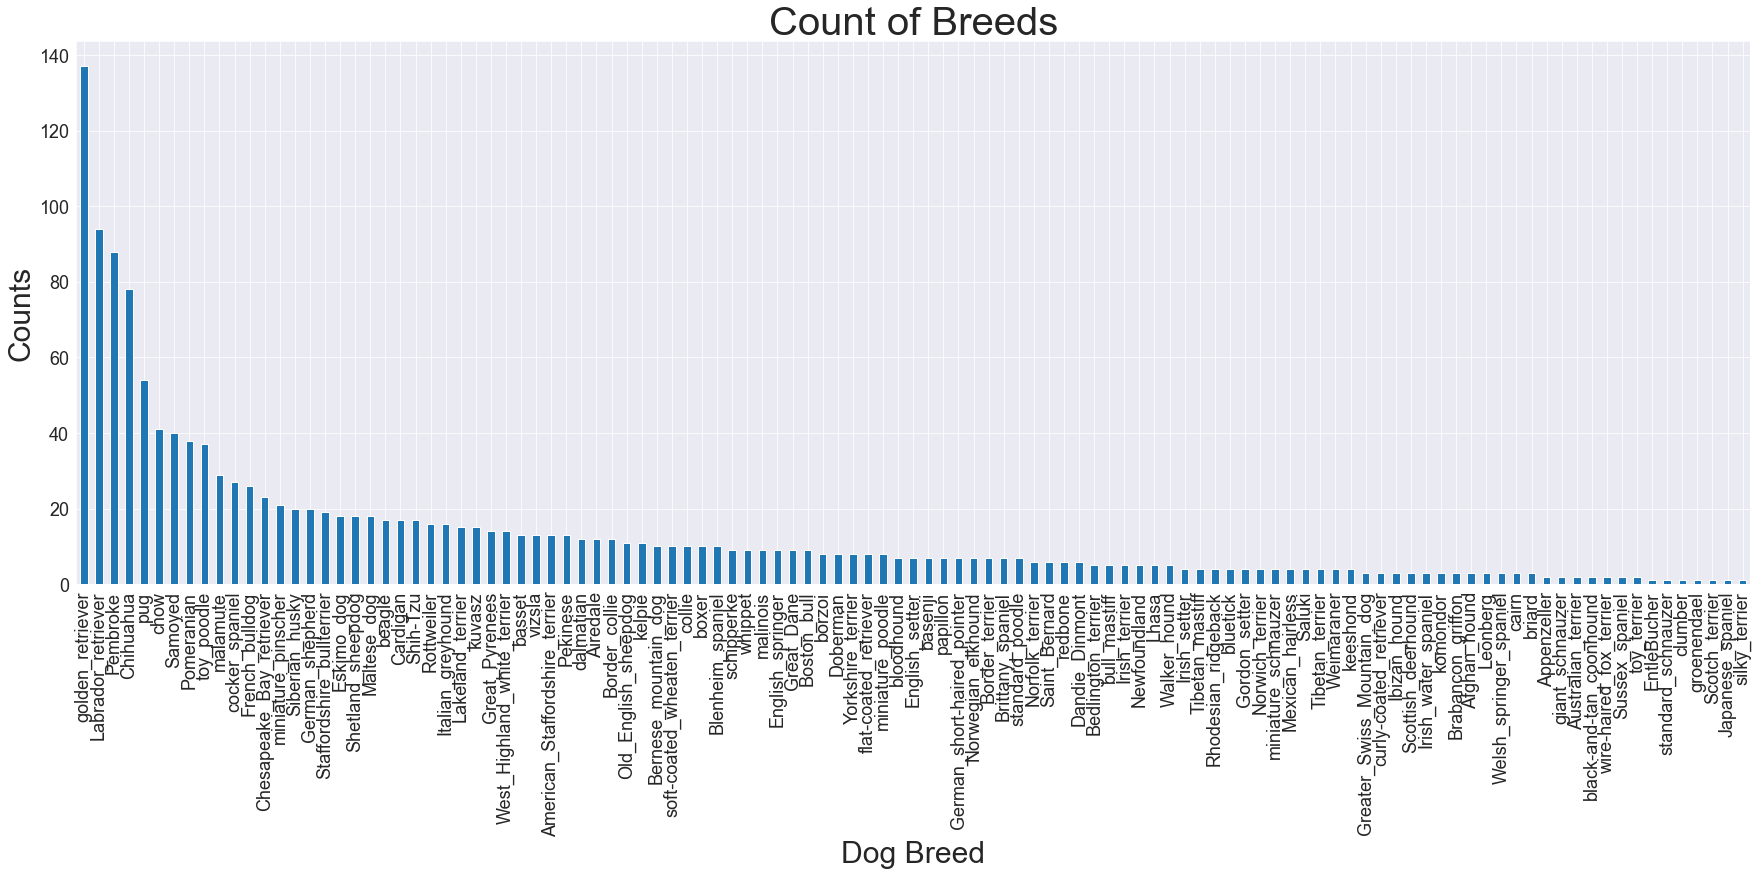

In [46]:
ax = df['p1'].value_counts().plot(kind='bar', figsize=(30,10), fontsize=18)
ax.set_xlabel('Dog Breed', fontsize=30)
ax.set_ylabel('Counts', fontsize=30)
ax.set_title('Count of Breeds', fontsize=40);

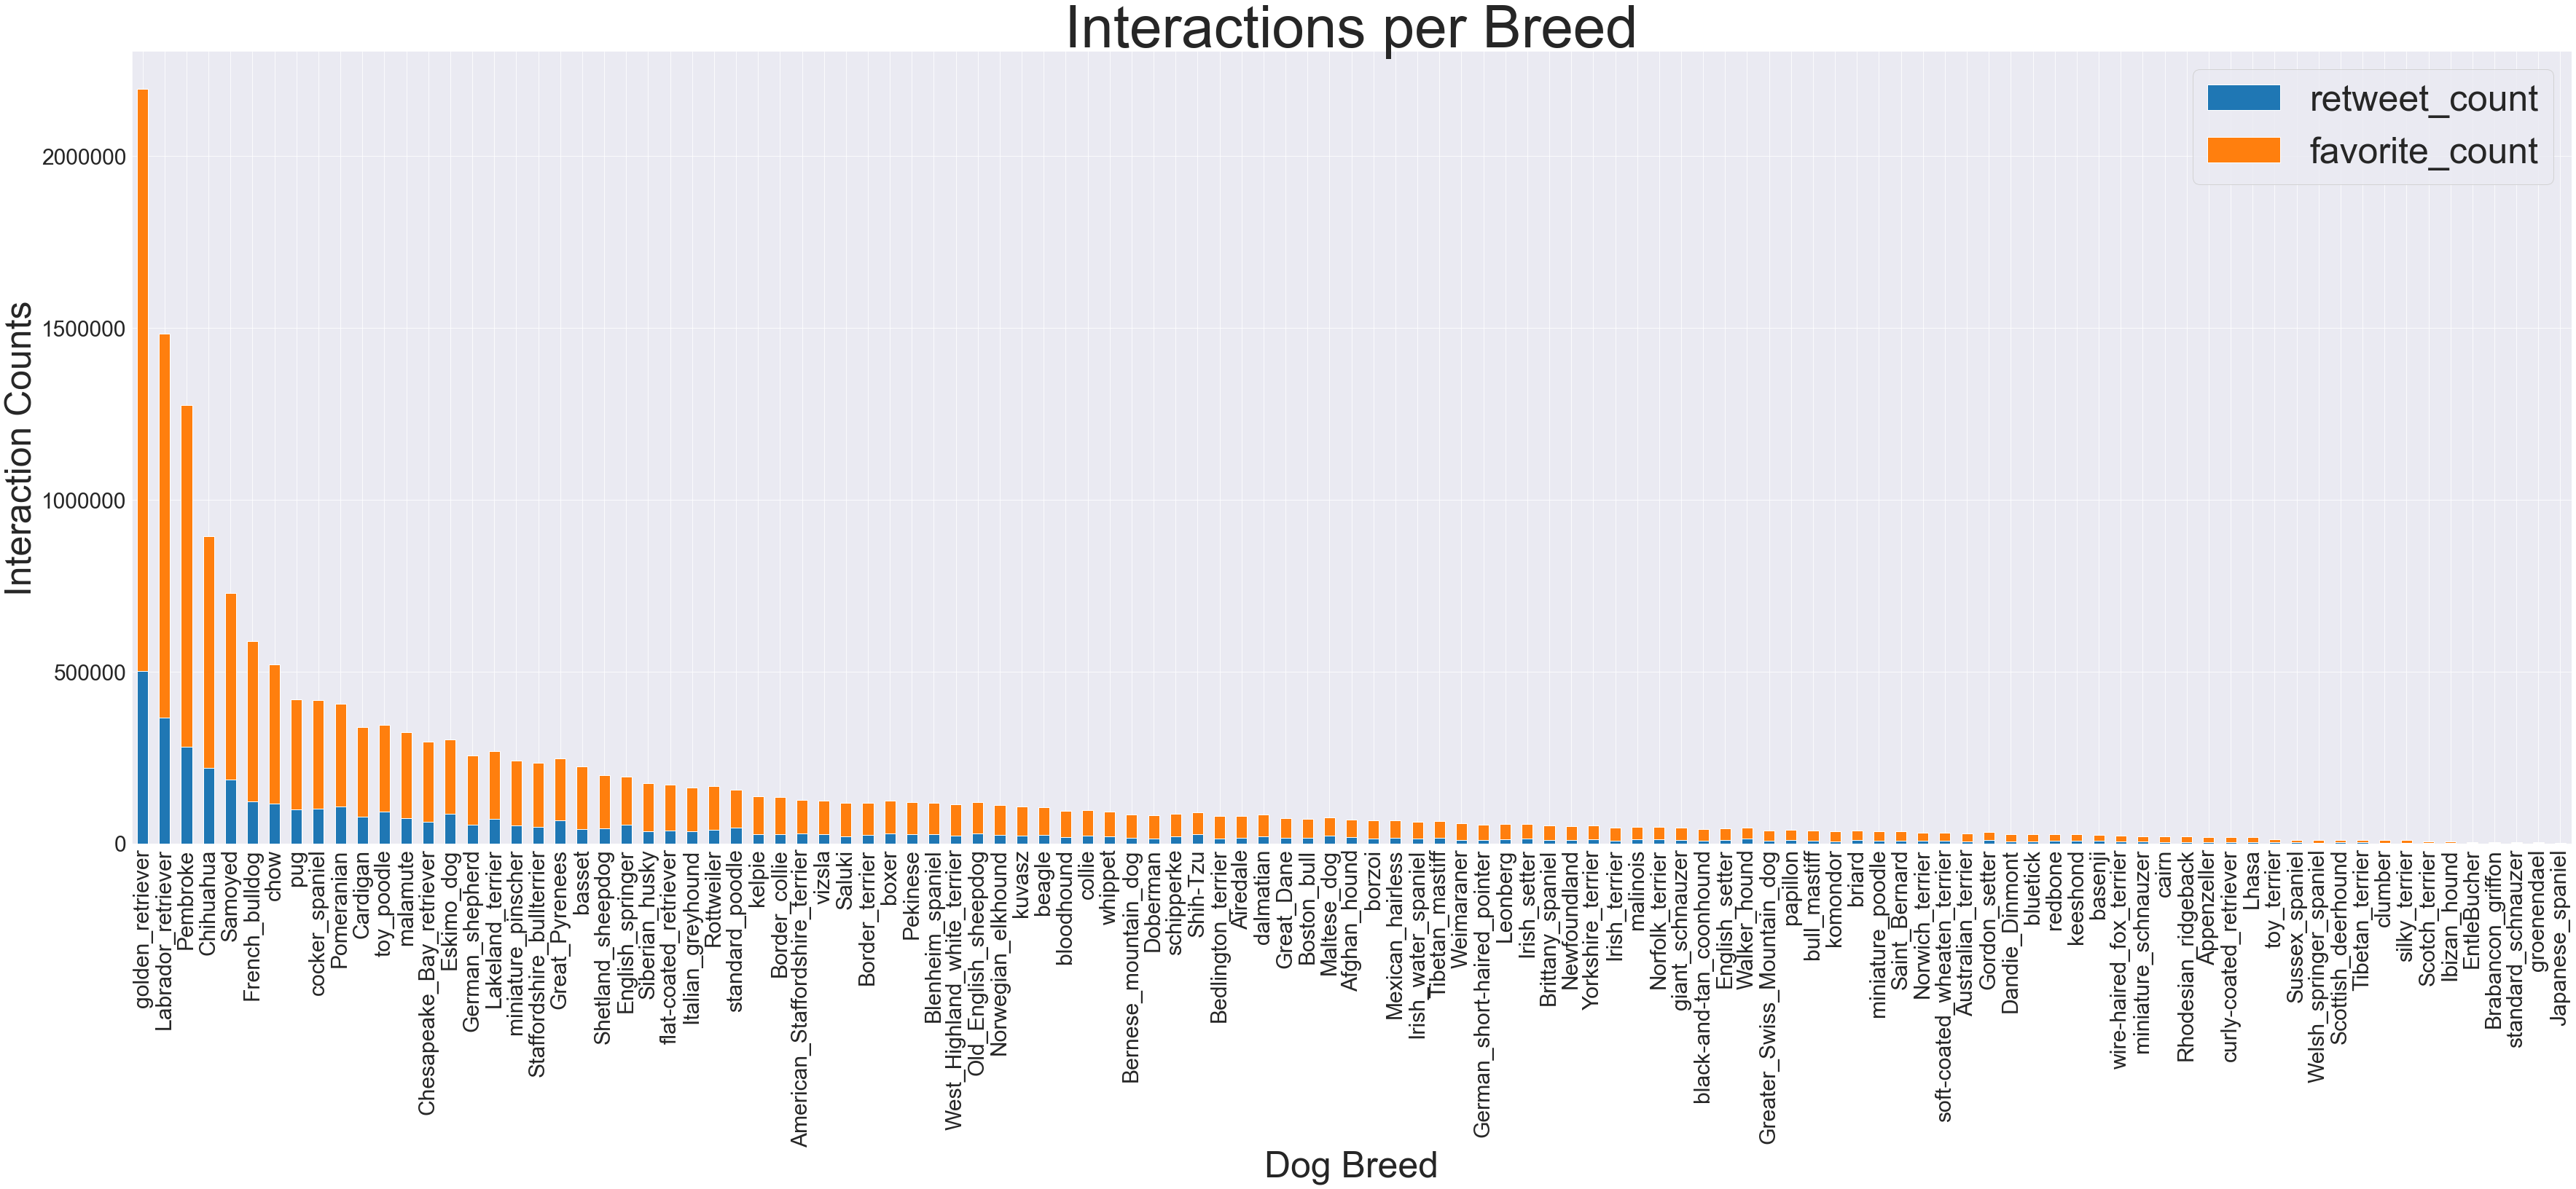

In [47]:
temp = df.groupby('p1')[['retweet_count', 'favorite_count']].sum().sort_values('favorite_count', ascending = False)
ax = temp.plot(kind='bar', stacked=True, fontsize=30,  figsize=(60,20))
ax.legend(fontsize=50);
ax.ticklabel_format(axis='y', style='plain')
ax.set_xlabel('Dog Breed', fontsize=50)
ax.set_ylabel('Interaction Counts', fontsize=50)
ax.set_title('Interactions per Breed', fontsize=80);

## Results

Clearly the 'golden retriever' and the 'labrador retriever' are leading in both, count and user interactions.

Studying user interactions based on rating of the dogs.

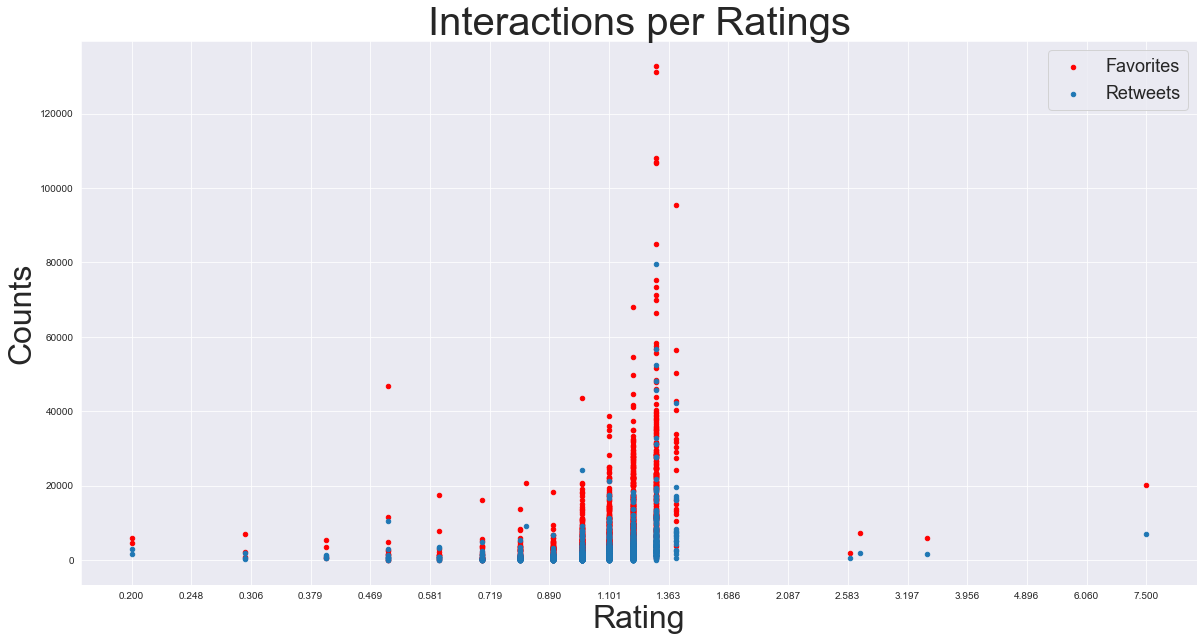

In [48]:
ax = df.plot(kind='scatter', x='rating', y='favorite_count', figsize=(20, 10), color='r')
df.plot(x='rating', y='retweet_count', kind='scatter', ax=ax);
ax.set_xlabel('Rating', fontsize=32)
ax.set_ylabel('Counts', fontsize=32)
ax.set_title('Interactions per Ratings', fontsize=40)
ax.set_xscale('log')
ax.set_xticks(np.geomspace(df['rating'].min(), df['rating'].max(), num= df['rating'].nunique()))

ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.legend(['Favorites', 'Retweets'], fontsize=18);

## Results

The twitter account is known for giving ratings more than 1, normally around 12/10, which is what the users most interact with, but going over the limit with overly high values does NOT bring more interactions with it.

Checking whether the used platform affects user interactions.

In [49]:
src = df.groupby('source')[['retweet_count', 'favorite_count']].agg(['count', 'mean', 'median'])
src

retweet_count                     favorite_count  \
                           count         mean median          count   
source                                                                
TweetDeck                      7  1965.000000    919              7   
Twitter Web Client            19  1717.736842    242             19   
Twitter for iPhone          1437  2821.402923   1473           1437   

                                        
                           mean median  
source                                  
TweetDeck           5402.142857   3444  
Twitter Web Client  4399.157895    559  
Twitter for iPhone  9416.806541   4582


Most of the posts are from 'Twitter for iPhone', which surprisingly has higher average interaction than normal.